# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [39]:
def fetch_current_price(asset='BTC'):
    """asset: BTC or ETH"""
    if asset.lower()=='btc':
        url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
    elif asset.lower()=='eth':
        url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
    else:
        return "Wrong Asset"
    try:
        resp = requests.get(url)
        data = resp.json()
        
        return list(data['data'].values())[0]['quotes']['CAD']['price']
    except:
        return f"ERROR Encountered in Fetching the Price for {asset}"

In [79]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = fetch_current_price("BTC")

# Fetch current ETH price
# YOUR CODE HERE!
eth_price = fetch_current_price("ETH")

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")

The current value of your 1.2 BTC is $31,210.38
The current value of your 5.3 ETH is $9,500.96


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [43]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [50]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
key = os.getenv("ALPACA_ID")
secret = os.getenv("ALPACA_SECRET")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(key_id=key,secret_key=secret,base_url='https://paper-api.alpaca.markets')

In [54]:
from datetime import datetime, timedelta

In [73]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = (datetime.now()-timedelta(days=7)).strftime("%Y-%m-%d")
end_date = datetime.now().strftime("%Y-%m-%d")
#NOT adding times since the API is not allowing it on free subscription

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
agg_close_price = alpaca.get_bars(tickers[0],timeframe=timeframe,limit=100).df.iloc[-1].close
spy_close_price = alpaca.get_bars(tickers[1],timeframe=timeframe,limit=100).df.iloc[-1].close


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Preview DataFrame
# YOUR CODE HERE!

In [74]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.2
Current SPY closing price: $367.95


In [78]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $18,397.50
The current value of your 200 AGG shares is $19,440.00


### Savings Health Analysis

In [93]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
total_shares = my_agg_value+my_spy_value
total_crypto = my_btc_value+my_eth_value

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame([total_crypto,total_shares],columns=['amount'])

df_savings.index = ['crypto','shares']

# Display savings DataFrame
display(df_savings)

,amount
crypto,40711.342174
shares,37837.500000


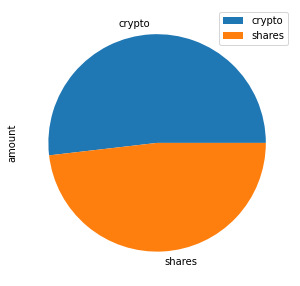

In [99]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(subplots=True,figsize=(15,5));

In [103]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings.amount.sum()

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Awesome Job! Your finances are in good health!")
elif total_savings == emergency_fund:
    print("Congratulations! You have met your financial goals!")
else:
    print(f"You are ${(emergency_fund-total_savings):0,.2f} away from reaching your financial goal...")

Awesome Job! Your finances are in good health!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [105]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [125]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
data = alpaca.get_bars(tickers,timeframe,start=start_date,end=end_date)
# Reorganize the DataFrame
df_stock_data = data.df
# Separate ticker data
# YOUR CODE HERE!
agg_df = df_stock_data[df_stock_data.symbol=='AGG'].drop('symbol',axis=1)
spy_df = df_stock_data[df_stock_data.symbol=='SPY'].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([agg_df,spy_df],axis=1,keys=tickers)

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [126]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
monte = MCSimulation(df_stock_data,weights=[0.4,0.6],num_simulation=500,num_trading_days=30*365)

In [132]:
# Printing the simulation input data
# YOUR CODE HERE!
monte.portfolio_data

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
...                           ...       ...       ...     ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.65  3480303   
2021-04-27 04:00:00+00:00  114.60  115.1300  114.3700  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.49  6469432   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   
...                               ...         ...          ...     ...   
2021-04-26 04:00:00+00:00       13520  114.706244    -0.000871  417.42   
2021-04-27 04:00:00+00:00       12720  114.498315    -0.002442  417.97   
2021-04-28 04:00:00+00:00       24303  114.379810     0.000525  417.84   
2021-04-29 04:00:00+00:00       21096  114.250702    -0.000524  420.38   
2021-04-30 04:00:00+00:00       19582  114.456246     0.001049  417.67   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.4100  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.2800  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.4200  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.4700  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.8800  205.70   89131004      340335   
...                           ...       ...     ...        ...         ...   
2021-04-26 04:00:00+00:00  418.22  416.8111  417.61   51824860      295870   
2021-04-27 04:00:00+00:00  418.14  416.3000  417.52   50297139      296300   
2021-04-28 04:00:00+00:00  419.01  416.9000  417.40   50692781      330049   
2021-04-29 04:00:00+00:00  420.72  416.4400  420.06   76965583      443396   
2021-04-30 04:00:00+00:00  418.54  416.3400  417.30   84731942      478844   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659  
...                               ...          ...  
2021-04-26 04:00:00+00:00  417.508245     0.002088  
2021-04-27 04:00:00+00:00  417.481360    -0.000216  
2021-04-28 04:00:00+00:00  417.742098    -0.000287  
2021-04-29 04:00:00+00:00  418.824046     0.006373  
2021-04-30 04:00:00+00:00  417.651995    -0.006570  

[1259 rows x 16 columns]

In [139]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
cumm_returns = monte.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/meesam/Sandbox/CharlotteUofT/Module5/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

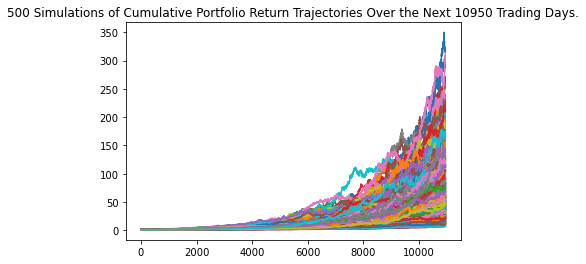

In [140]:
# Plot simulation outcomes
# YOUR CODE HERE!
monte.plot_simulation();

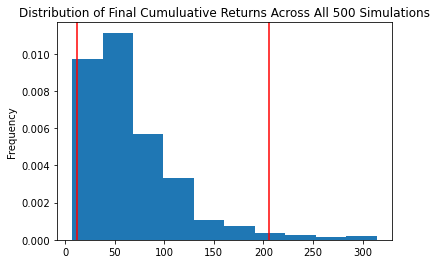

In [141]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
monte.plot_distribution();

### Retirement Analysis

In [142]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = monte.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
display(stats)

count           500.000000
mean             66.248907
std              48.205586
min               7.075526
25%              34.759462
50%              53.205200
75%              84.241056
max             314.011986
95% CI Lower     12.254114
95% CI Upper    205.915697
Name: 10950, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [149]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = initial_investment*stats['95% CI Lower']
ci_upper = initial_investment*stats['95% CI Upper']
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.0f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.0f} and ${ci_upper:,.0f}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $245,082 and $4,118,314


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [151]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = initial_investment*stats['95% CI Lower']
ci_upper = initial_investment*stats['95% CI Upper']


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.0f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.0f} and ${ci_upper:,.0f}")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 30 years will end within in the range of $367,623 and $6,177,471


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [159]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE! 20% bond 80% stock
monte = MCSimulation(df_stock_data,weights=[0.4,0.6],num_simulation=500,num_trading_days=5*365)

In [160]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
cumm_returns = monte.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/meesam/Sandbox/CharlotteUofT/Module5/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

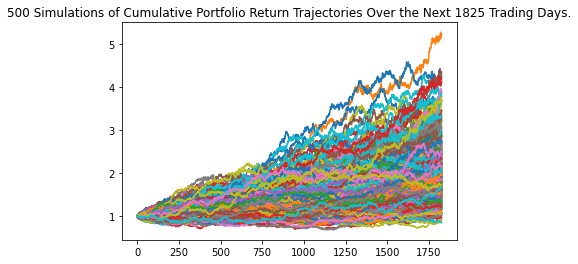

In [161]:
# Plot simulation outcomes
# YOUR CODE HERE!
monte.plot_simulation();

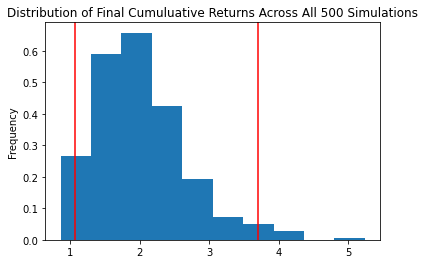

In [162]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
monte.plot_distribution();

In [163]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = monte.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
display(stats)

count           500.000000
mean              2.012376
std               0.656213
min               0.857460
25%               1.571455
50%               1.897018
75%               2.354003
max               5.238579
95% CI Lower      1.064210
95% CI Upper      3.693417
Name: 1825, dtype: float64

In [164]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = initial_investment*stats['95% CI Lower']
ci_upper_five = initial_investment*stats['95% CI Upper']
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $21284.20161296138 and $73868.33350527506


### Ten Years Retirement Option

In [165]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
monte = MCSimulation(df_stock_data,weights=[0.2,0.8],num_simulation=500,num_trading_days=10*365)

In [166]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
cumm_returns = monte.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/meesam/Sandbox/CharlotteUofT/Module5/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

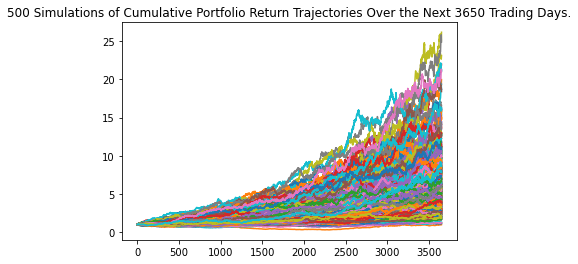

In [167]:
# Plot simulation outcomes
# YOUR CODE HERE!
monte.plot_simulation();

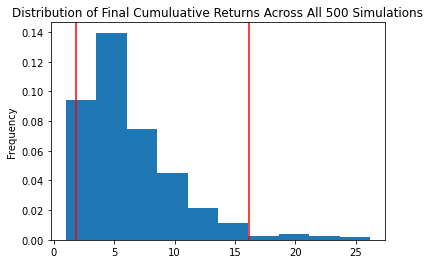

In [168]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
monte.plot_distribution();

In [169]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = monte.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
display(stats)

count           500.000000
mean              6.356920
std               3.946259
min               0.979408
25%               3.590393
50%               5.340589
75%               8.336714
max              26.192314
95% CI Lower      1.848006
95% CI Upper     16.162588
Name: 3650, dtype: float64

In [172]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = initial_investment*stats['95% CI Lower']
ci_upper_ten = initial_investment*stats['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.0f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.0f} and ${ci_upper_ten:,.0f}")

There is a 95% chance that an initial investment of $60,000 in the portfolio over the next 10 years will end within in the range of $110,880 and $969,755
